# Лабораторна робота №3. Дослiдження варiантiв архiтектур згроткових нейронних мереж

**Виконала** студентка групи КІ-51мп Додонова Марія

**Мета:** Вивчити та реалiзувати вiдомi архiтектури згорткових нейронних мереж (VGGNet, ResNet, Inception), провести їх порiвняльний аналiз мiж собою та з простою моделлю, реалiзованою в попереднiй лабораторнiй роботi.

## Порядок виконання

1. Обрати фреймворк для виконання роботи: `tensorflow` чи `pytorch`.

2. Взяти задачу i вiдповiдний датасет (Fashion MNIST, CIFAR-10 або CIFAR-100) з лабораторної роботи No2. Використовуйте той самий розподiл на тренувальну, валiдацiйну та тестову вибiрки для коректного порiвняння результатiв.

3. Реалiзувати "з нуля" 2 вiдомi архiтектури з наведеного списку. "З нуля" означає самостiйну побудову моделi з використанням готових шарiв (Conv2d, MaxPool2d, BatchNorm, etc.) з вiдповiдних бiблiотек.
* VGGNet (наприклад, VGG16);
* Inception (наприклад, GoogLeNet / Inception v1);
* ResNet (наприклад, ResNet18 або ResNet34);
* Будь-яку iншу сучасну архiтектуру за [даним посиланням](https://huggingface.co/papers/trending).

4. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте [Google Colab](https://colab.research.google.com/).

5. Для кожної моделi побудувати графiки навчання (loss та точнiсть) на тренувальнiй та валiдацiйнiй вибiрках.

6. Проаналiзувати отриманi результати. Виконати порiвняння точностi, швидкостi збiжностi та кiлькостi параметрiв реалiзованих моделей мiж собою та з простою моделлю з лабораторної роботи No2. Зробити детальнi висновки.

## Виконання роботи

### 1. Обрати фреймворк для виконання роботи: `tensorflow` чи `pytorch`.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

from src.models.vggnet import VGGNet
from src.models.resnet import ResNet
from src.trainer import Trainer
from src.plot_tools import plot_history

DATA_PATH = "data"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001

print(f"Using device: {DEVICE}")

Using device: cuda


### 2. Взяти задачу i вiдповiдний датасет (Fashion MNIST, CIFAR-10 або CIFAR-100) з лабораторної роботи No2. Використовуйте той самий розподiл на тренувальну, валiдацiйну та тестову вибiрки для коректного порiвняння результатiв.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load train and test splits
train_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=False,
    download=True,
    transform=transform
)

# Split train into train and validation
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)

### 3. Реалiзувати "з нуля" 2 вiдомi архiтектури з наведеного списку. "З нуля" означає самостiйну побудову моделi з використанням готових шарiв (Conv2d, MaxPool2d, BatchNorm, etc.) з вiдповiдних бiблiотек.
* VGGNet (наприклад, VGG16);
* Inception (наприклад, GoogLeNet / Inception v1);
* ResNet (наприклад, ResNet18 або ResNet34);
* Будь-яку iншу сучасну архiтектуру за [даним посиланням](https://huggingface.co/papers/trending).

### 4. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте [Google Colab](https://colab.research.google.com/).

In [3]:
criterion = nn.CrossEntropyLoss()

print("Training VGGNet:")
vgg_model = VGGNet()
vgg_optimizer = optim.Adam(vgg_model.parameters(), lr=LEARNING_RATE)
vgg_trainer = Trainer(vgg_model, vgg_optimizer, criterion, device=DEVICE)
vgg_history = vgg_trainer.train(NUM_EPOCHS, train_loader, val_loader)

print("\nTraining ResNet:")
resnet_model = ResNet()
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=LEARNING_RATE)
resnet_trainer = Trainer(resnet_model, resnet_optimizer, criterion, device=DEVICE)
resnet_history = resnet_trainer.train(NUM_EPOCHS, train_loader, val_loader)

print("\nFinished Training!")

Training VGGNet:
Epoch [ 1/10]: Train Loss: 1.9961, Val Loss: 1.7611, Train Accuracy: 0.1982, Val Accuracy: 0.2753.
Epoch [ 2/10]: Train Loss: 1.6376, Val Loss: 1.5515, Train Accuracy: 0.3569, Val Accuracy: 0.4183.
Epoch [ 3/10]: Train Loss: 1.4050, Val Loss: 1.2679, Train Accuracy: 0.4781, Val Accuracy: 0.5371.
Epoch [ 4/10]: Train Loss: 1.1932, Val Loss: 1.1423, Train Accuracy: 0.5720, Val Accuracy: 0.5968.
Epoch [ 5/10]: Train Loss: 1.0613, Val Loss: 1.0414, Train Accuracy: 0.6230, Val Accuracy: 0.6273.
Epoch [ 6/10]: Train Loss: 0.9593, Val Loss: 1.0062, Train Accuracy: 0.6629, Val Accuracy: 0.6480.
Epoch [ 7/10]: Train Loss: 0.8618, Val Loss: 0.9999, Train Accuracy: 0.6992, Val Accuracy: 0.6557.
Epoch [ 8/10]: Train Loss: 0.7756, Val Loss: 1.0361, Train Accuracy: 0.7288, Val Accuracy: 0.6549.
Epoch [ 9/10]: Train Loss: 0.6884, Val Loss: 0.9824, Train Accuracy: 0.7624, Val Accuracy: 0.6808.
Epoch [10/10]: Train Loss: 0.6146, Val Loss: 0.9905, Train Accuracy: 0.7901, Val Accuracy: 0

### 5. Для кожної моделi побудувати графiки навчання (loss та точнiсть) на тренувальнiй та валiдацiйнiй вибiрках.


VGGNet Curves


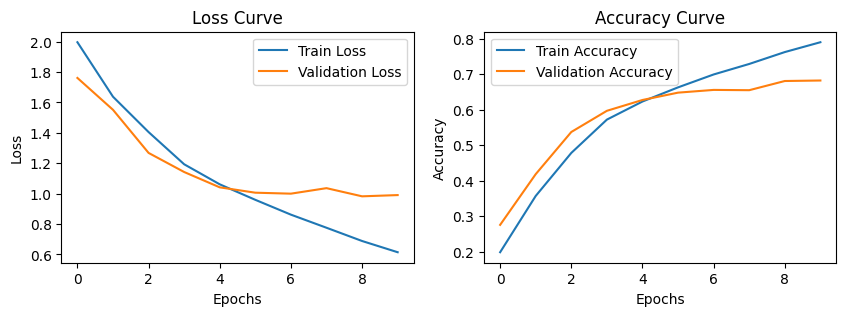


ResNet Curves


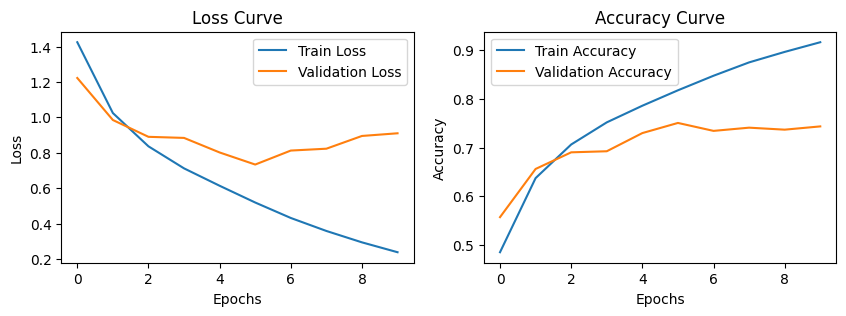

In [4]:
print("VGGNet Curves")
plot_history(vgg_history)

print("\nResNet Curves")
plot_history(resnet_history)

### 6. Проаналiзувати отриманi результати. Виконати порiвняння точностi, швидкостi збiжностi та кiлькостi параметрiв реалiзованих моделей мiж собою та з простою моделлю з лабораторної роботи No2. Зробити детальнi висновки.

Порівнюючи графіки навчання мереж VGGNet та ResNet можна помітити, що результуючі значення точності та втрати є приблизно однаковими, хоча навчання ResNet є менш стабільним та тут присутнє перенавчання. Навчання VGGNet є більш стабільним та з меншими ознаками перенавчання, хоча фінальні метрики на 10 епохах трохи гірші, аніж у ResNet. Обидві мережі демонструють значно кращі результати, аніж модель LeNet5 із попередньої роботи. Це можливо завдяки складнішій архітектурі та більшій кількості параметрів. Мережі VGGNet та ResNet збігаються швидше, аніж LeNet5.

## Висновок

В ході виконання роботи було завантажено, передоброблено та розділено датасет FashionMNIST на тренувальну, валідаційну та тестову вибірки, реалізовано архітектури згорткових нейронних мереж VGGNet та ResNet. Було навчено мережі на завантаженому датасеті з використанням різних гіперпараметрів та побудовано графіки навчання мереж.

Порівнюючи графіки навчання мереж VGGNet та ResNet можна помітити, що результуючі значення точності та втрати є приблизно однаковими, хоча навчання ResNet є менш стабільним та тут присутнє перенавчання. Навчання VGGNet є більш стабільним та з меншими ознаками перенавчання, хоча фінальні метрики на 10 епохах трохи гірші, аніж у ResNet. Обидві мережі демонструють значно кращі результати, аніж модель LeNet5 із попередньої роботи. Це можливо завдяки складнішій архітектурі та більшій кількості параметрів. Мережі VGGNet та ResNet збігаються швидше, аніж LeNet5.